In [1]:
'''
The purpose of this code is to find how many companies
are registered in each of the United States of America
and visualize the results with Matplotlib
'''

# Import the necessary libraries: Pandas, Matplotlib and Regex
import pandas as pd
import matplotlib.pyplot as plt
import re


# Read the CSV file
df = pd.read_csv("Ecommerce Purchases")

'''
Take a look at the first 5 entries in the Address column
we can see that the States are abreviated
with capital letters " NE , TN , AP , WA , TX "
separated with spaces
'''
df["Address"].head(5)

0    16629 Pace Camp Apt. 448\nAlexisborough, NE 77...
1    9374 Jasmine Spurs Suite 508\nSouth John, TN 8...
2                     Unit 0065 Box 5052\nDPO AP 27450
3                7780 Julia Fords\nNew Stacy, WA 45798
4    23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...
Name: Address, dtype: object

In [2]:
'''
BECAUSE WE DON'T KNOW how many of the states appear in the CSV file,
we can create a function that searches for all the abreviations using REGEX,
adds them to the list if they are not already in the list
and sorts the list
'''
def states(lst):
    global st
    st = []
    for x in lst:
        m = re.search(r"\s[A-Z]{2}\s",x)
        if m[0][1:3] not in st: # m[0][1:3] is needed to remove the white spaces, ['AA'] instead of [' AA ']
            st.append(m[0][1:3])
            st.sort()
        else:
            pass
    return st

# apply the function to the "Address" column in the CSV file
states(df["Address"])

# this is the list of states that appear in the CSV file
print(st)

['AA', 'AE', 'AK', 'AL', 'AP', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'FM', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MH', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'PW', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY']


In [3]:
'''
we can use LAMBDA to search the "Address" column for each of the states in the list above,
use value_counts() method to get the number of times each state appears
and create a dictionary of state:times
'''

us = {} # this is the empty dictionary needed to be filled with state:time

for y in st:
    n = df["Address"].apply(lambda x: y in x).value_counts().loc[True]
    us.update({y.strip():n})

print(us)

{'AA': 351, 'AE': 331, 'AK': 157, 'AL': 148, 'AP': 595, 'AR': 147, 'AS': 141, 'AZ': 145, 'CA': 146, 'CO': 133, 'CT': 159, 'DC': 143, 'DE': 156, 'FL': 140, 'FM': 149, 'GA': 159, 'GU': 151, 'HI': 151, 'IA': 143, 'ID': 152, 'IL': 164, 'IN': 183, 'KS': 162, 'KY': 160, 'LA': 153, 'MA': 172, 'MD': 162, 'ME': 155, 'MH': 153, 'MI': 160, 'MN': 146, 'MO': 149, 'MP': 147, 'MS': 173, 'MT': 139, 'NC': 165, 'ND': 146, 'NE': 144, 'NH': 166, 'NJ': 153, 'NM': 130, 'NV': 214, 'NY': 145, 'OH': 149, 'OK': 159, 'OR': 136, 'PA': 137, 'PR': 140, 'PW': 170, 'RI': 161, 'SC': 570, 'SD': 148, 'TN': 127, 'TX': 146, 'UT': 151, 'VA': 154, 'VI': 178, 'VT': 131, 'WA': 163, 'WI': 160, 'WV': 157, 'WY': 150}


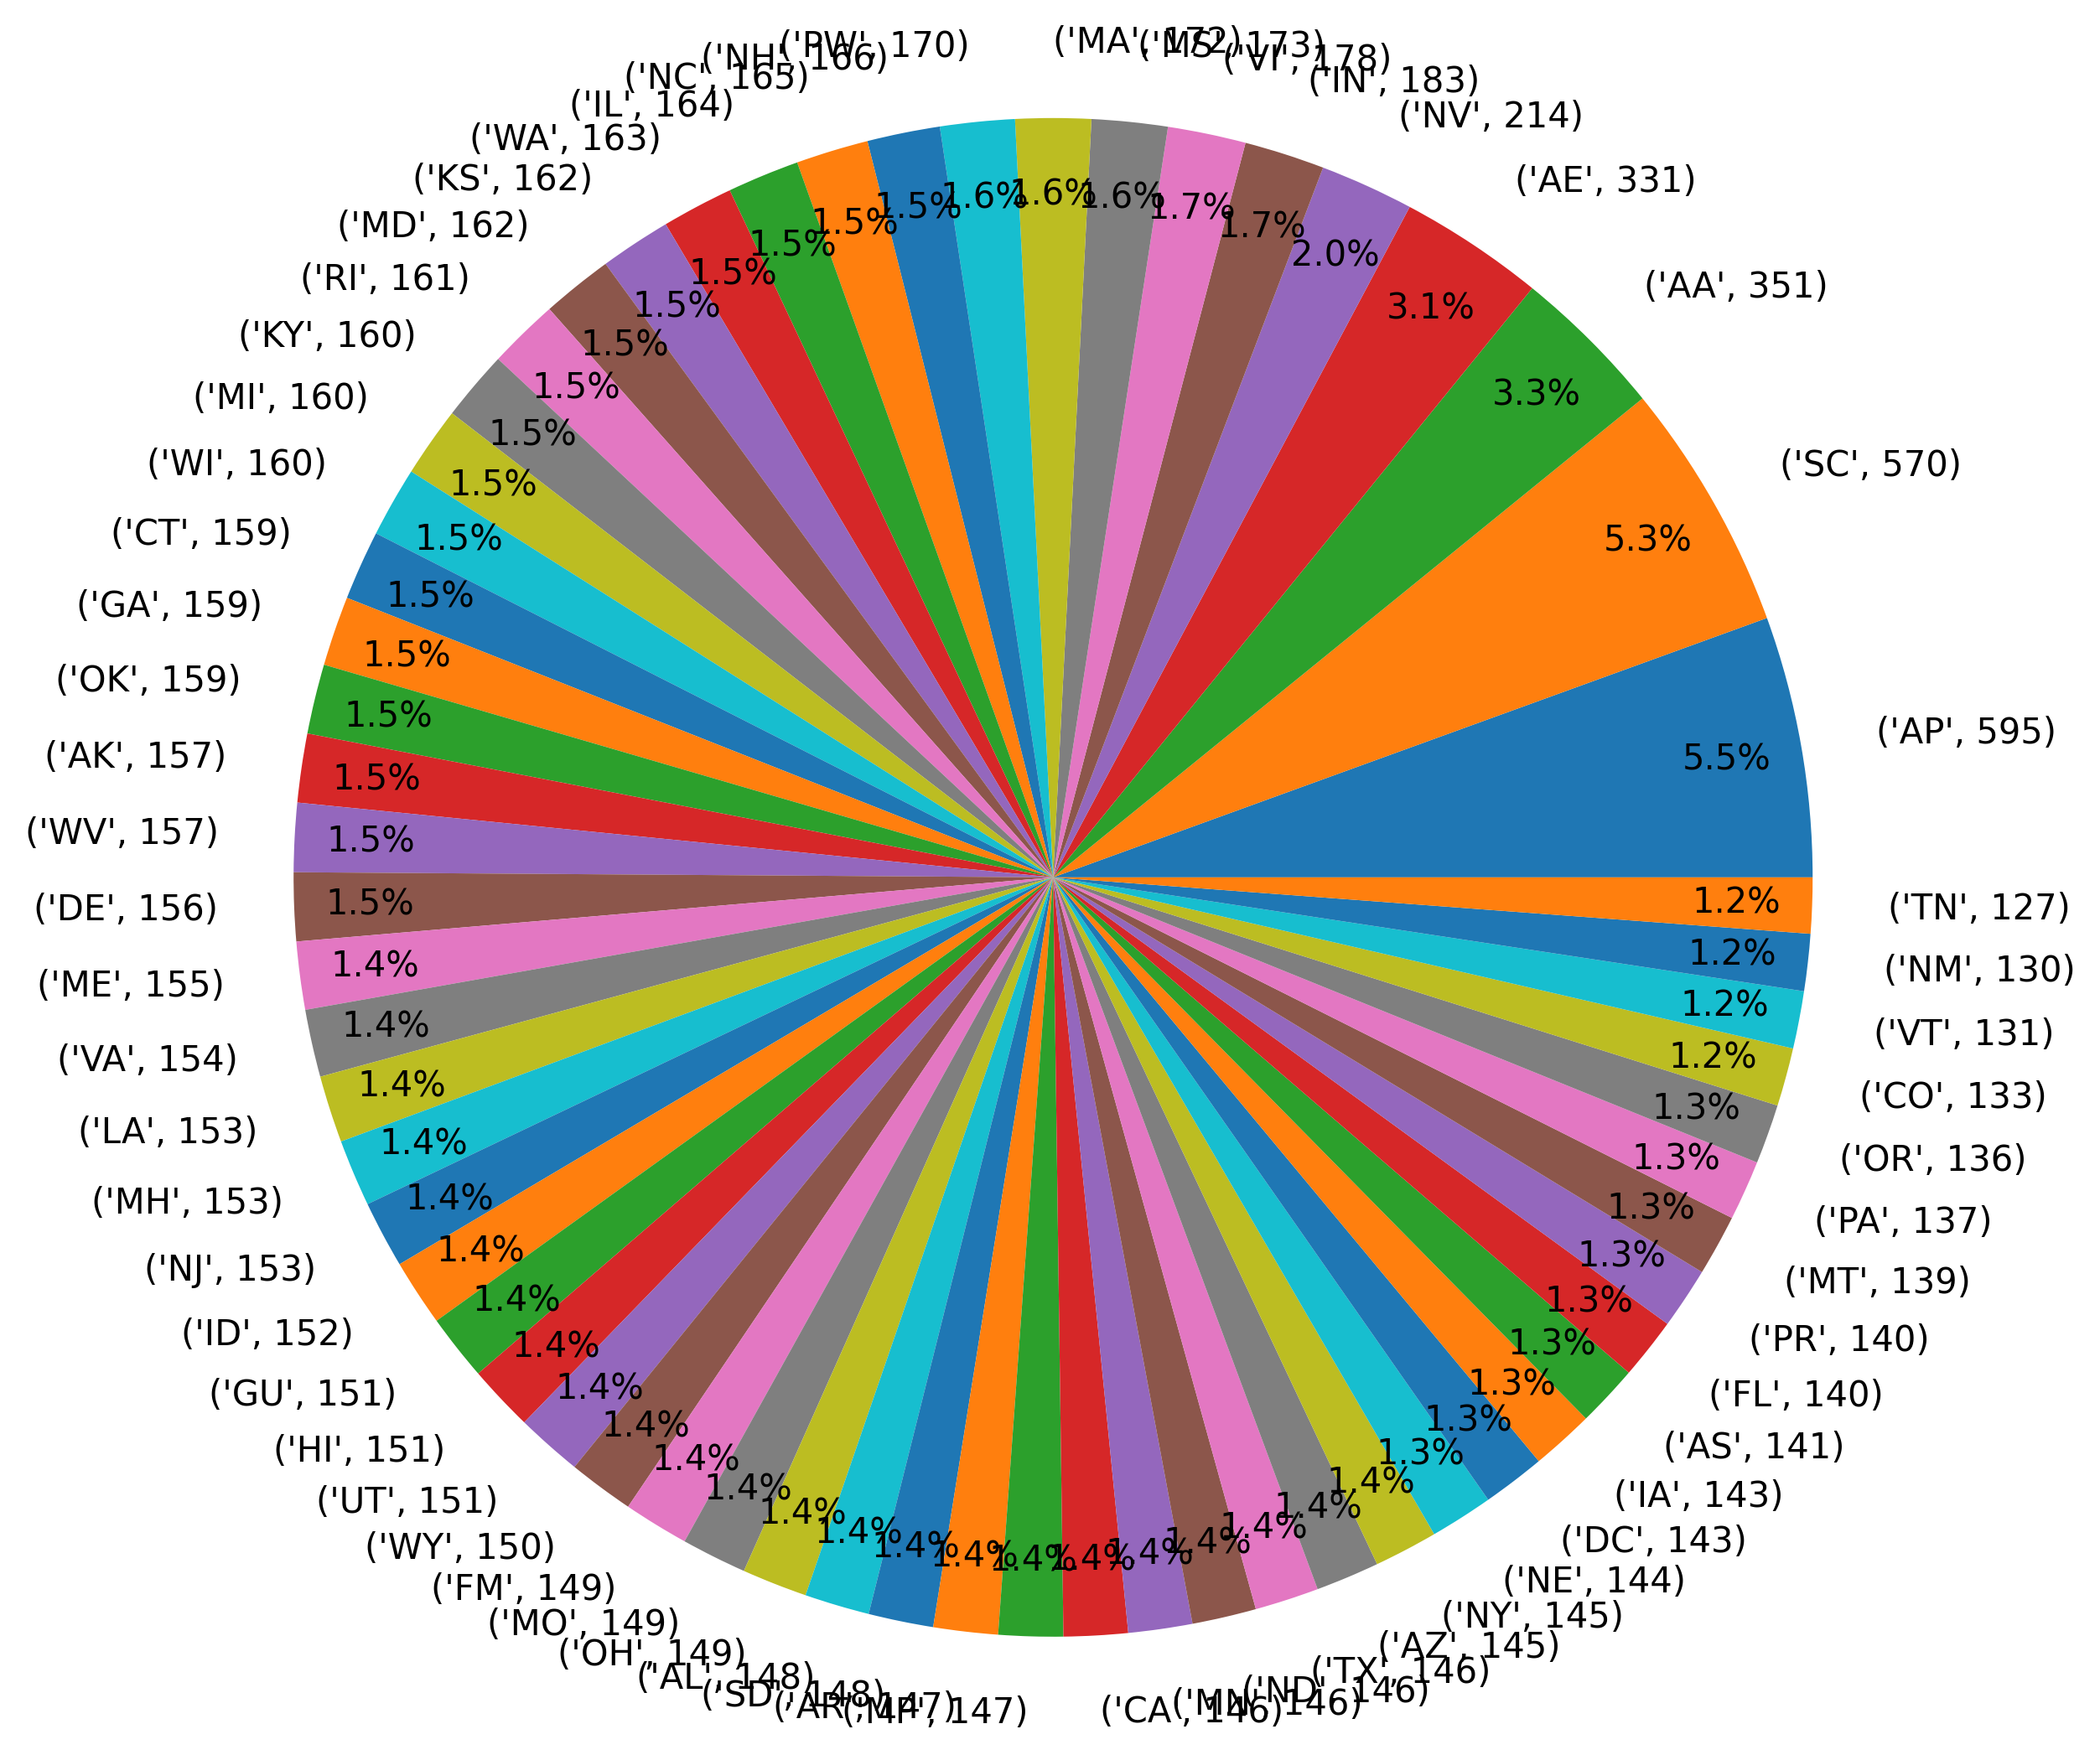

In [4]:
# create the Matplot PIE
fig,axes = plt.subplots(nrows=1,ncols=1,dpi=300)
axes.pie(sorted(us.values(),reverse=True),labels=sorted(us.items(),key=(lambda x: x[1]),reverse=True),autopct="%1.1f%%",pctdistance=0.9,radius=2.5)

# display the Matplot PIE
plt.show()